In [ ]:
## Data loading
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing

# hsl256 칼라바 데이터
hsl256 = pd.read_csv('/content/drive/MyDrive/plastic_transporting/data/hsl256_white.csv')
hsl256_colorbar = matplotlib.colors.ListedColormap(np.array(hsl256), name='hsl256', N=None)

# hsl256 칼라바 데이터2
hsl2562 = pd.read_csv('/content/drive/MyDrive/plastic_transporting/data/hsl256.csv')
hsl256_colorbar2 = matplotlib.colors.ListedColormap(np.array(hsl2562), name='hsl256', N=None)

# amp 칼라바 데이터
amp_data = pd.read_csv('/content/drive/MyDrive/plastic_transporting/data/amp.csv')
amp = matplotlib.colors.ListedColormap(np.array(amp_data), name='amp', N=None)

# matter 칼라바 데이터
matter_data = pd.read_csv('/content/drive/MyDrive/plastic_transporting/data/matter.csv')
matter = matplotlib.colors.ListedColormap(np.array(matter_data), name='matter', N=None)

# 해안선 데이터
latc = pd.read_csv('/content/drive/MyDrive/plastic_transporting/data/eastasian_coastline_latitude.csv', header = None)
lonc = pd.read_csv('/content/drive/MyDrive/plastic_transporting/data/eastasian_coastline_longitude.csv', header = None)

## 위도 범위 - 무조건 정수로 적어
min_lat = 24
max_lat = 45

## 경도 범위 - 무조건 정수로 적어
min_lon = 116
max_lon = 142

plot_extent = [min_lon, max_lon, min_lat, max_lat]

## unique_time_by_month
unique_time_by_month = ['2016-11-26T00:00:00Z', '2016-12-26T00:00:00Z', '2017-01-26T00:00:00Z', '2017-02-25T00:00:00Z', '2017-03-28T00:00:00Z', '2017-04-27T00:00:00Z', '2017-05-28T00:00:00Z', '2017-06-27T00:00:00Z', '2017-07-27T00:00:00Z', '2017-08-27T00:00:00Z', '2017-09-26T00:00:00Z', '2017-10-27T00:00:00Z', '2017-11-26T00:00:00Z', '2017-12-26T00:00:00Z', '2018-01-26T00:00:00Z', '2018-02-25T00:00:00Z', '2018-03-28T00:00:00Z', '2018-04-27T00:00:00Z', '2018-05-28T00:00:00Z', '2018-06-27T00:00:00Z', '2018-07-27T00:00:00Z', '2018-08-27T00:00:00Z', '2018-09-26T00:00:00Z', '2018-10-27T00:00:00Z', '2018-11-21T00:00:00Z']
unique_time = ['2016-11-21T00:00:00Z', '2016-11-26T00:00:00Z', '2016-12-01T00:00:00Z', '2016-12-06T00:00:00Z', '2016-12-11T00:00:00Z', '2016-12-16T00:00:00Z','2016-12-21T00:00:00Z', '2016-12-26T00:00:00Z',
       '2017-01-01T00:00:00Z', '2017-01-06T00:00:00Z','2017-01-11T00:00:00Z', '2017-01-16T00:00:00Z','2017-01-21T00:00:00Z', '2017-01-26T00:00:00Z','2017-01-31T00:00:00Z', '2017-02-05T00:00:00Z',
       '2017-02-10T00:00:00Z', '2017-02-15T00:00:00Z','2017-02-20T00:00:00Z', '2017-02-25T00:00:00Z','2017-03-02T00:00:00Z', '2017-03-07T00:00:00Z','2017-03-12T00:00:00Z', '2017-03-18T00:00:00Z',
       '2017-03-23T00:00:00Z', '2017-03-28T00:00:00Z','2017-04-02T00:00:00Z', '2017-04-07T00:00:00Z','2017-04-12T00:00:00Z', '2017-04-17T00:00:00Z','2017-04-22T00:00:00Z', '2017-04-27T00:00:00Z',
       '2017-05-02T00:00:00Z', '2017-05-07T00:00:00Z','2017-05-12T00:00:00Z', '2017-05-17T00:00:00Z','2017-05-22T00:00:00Z', '2017-05-28T00:00:00Z','2017-06-02T00:00:00Z', '2017-06-07T00:00:00Z',
       '2017-06-12T00:00:00Z', '2017-06-17T00:00:00Z','2017-06-22T00:00:00Z', '2017-06-27T00:00:00Z','2017-07-02T00:00:00Z', '2017-07-07T00:00:00Z','2017-07-12T00:00:00Z', '2017-07-17T00:00:00Z',
       '2017-07-22T00:00:00Z', '2017-07-27T00:00:00Z','2017-08-01T00:00:00Z', '2017-08-06T00:00:00Z','2017-08-12T00:00:00Z', '2017-08-17T00:00:00Z','2017-08-22T00:00:00Z', '2017-08-27T00:00:00Z',
       '2017-09-01T00:00:00Z', '2017-09-06T00:00:00Z','2017-09-11T00:00:00Z', '2017-09-16T00:00:00Z','2017-09-21T00:00:00Z', '2017-09-26T00:00:00Z','2017-10-01T00:00:00Z', '2017-10-06T00:00:00Z',
       '2017-10-11T00:00:00Z', '2017-10-16T00:00:00Z','2017-10-22T00:00:00Z', '2017-10-27T00:00:00Z','2017-11-01T00:00:00Z', '2017-11-06T00:00:00Z','2017-11-11T00:00:00Z', '2017-11-16T00:00:00Z',
       '2017-11-21T00:00:00Z', '2017-11-26T00:00:00Z','2017-12-01T00:00:00Z', '2017-12-06T00:00:00Z','2017-12-11T00:00:00Z', '2017-12-16T00:00:00Z','2017-12-21T00:00:00Z', '2017-12-26T00:00:00Z',
       '2018-01-01T00:00:00Z', '2018-01-06T00:00:00Z','2018-01-11T00:00:00Z', '2018-01-16T00:00:00Z','2018-01-21T00:00:00Z', '2018-01-26T00:00:00Z','2018-01-31T00:00:00Z', '2018-02-05T00:00:00Z',
       '2018-02-10T00:00:00Z', '2018-02-15T00:00:00Z','2018-02-20T00:00:00Z', '2018-02-25T00:00:00Z','2018-03-02T00:00:00Z', '2018-03-07T00:00:00Z','2018-03-12T00:00:00Z', '2018-03-18T00:00:00Z',
       '2018-03-23T00:00:00Z', '2018-03-28T00:00:00Z','2018-04-02T00:00:00Z', '2018-04-07T00:00:00Z','2018-04-12T00:00:00Z', '2018-04-17T00:00:00Z','2018-04-22T00:00:00Z', '2018-04-27T00:00:00Z',
       '2018-05-02T00:00:00Z', '2018-05-07T00:00:00Z','2018-05-12T00:00:00Z', '2018-05-17T00:00:00Z','2018-05-22T00:00:00Z', '2018-05-28T00:00:00Z','2018-06-02T00:00:00Z', '2018-06-07T00:00:00Z',
       '2018-06-12T00:00:00Z', '2018-06-17T00:00:00Z','2018-06-22T00:00:00Z', '2018-06-27T00:00:00Z','2018-07-02T00:00:00Z', '2018-07-07T00:00:00Z','2018-07-12T00:00:00Z', '2018-07-17T00:00:00Z',
       '2018-07-22T00:00:00Z', '2018-07-27T00:00:00Z','2018-08-01T00:00:00Z', '2018-08-06T00:00:00Z','2018-08-12T00:00:00Z', '2018-08-17T00:00:00Z','2018-08-22T00:00:00Z', '2018-08-27T00:00:00Z',
       '2018-09-01T00:00:00Z', '2018-09-06T00:00:00Z','2018-09-11T00:00:00Z', '2018-09-16T00:00:00Z','2018-09-21T00:00:00Z', '2018-09-26T00:00:00Z','2018-10-01T00:00:00Z', '2018-10-06T00:00:00Z',
       '2018-10-11T00:00:00Z', '2018-10-16T00:00:00Z','2018-10-22T00:00:00Z', '2018-10-27T00:00:00Z','2018-11-01T00:00:00Z', '2018-11-06T00:00:00Z','2018-11-11T00:00:00Z', '2018-11-16T00:00:00Z',
       '2018-11-21T00:00:00Z']

In [ ]:
### 데이터 내삽을 위한 준비단계
import numpy as np

# 내삽의 정도 - 현재는 10배 내삽해서 1/30 위도, 경도 간격이다.(약 3, 400m)
# 대략적으로 10배 내삽하였을 때 하루당 3초의 running time
# 100배 내삽하였을 때 하루당 300초의 running time
degree_of_interpolation = 40
d_lon_lat = 1 / 3 / degree_of_interpolation
print(d_lon_lat)
d_lon_lat_before_interpolation = 1 / 3

# 데이터 내의 위도의 갯수, 경도의 갯수
number_of_latitude = (max_lat - min_lat) * 3 + 1
number_of_longitude = (max_lon - min_lon) * 3 + 1

# 내삽하기 전의 그리드
lat_grid_before_interpolation = np.linspace(min_lat, max_lat, number_of_latitude).tolist()
lon_grid_before_interpolation = np.linspace(min_lon, max_lon, number_of_longitude).tolist()
lon_meshgrid_before_interpolation, lat_meshgrid_before_interpolation = np.meshgrid(lon_grid_before_interpolation, lat_grid_before_interpolation)
print('내삽하기 전의 그리드')
print(lat_grid_before_interpolation[::-1])
print(lon_grid_before_interpolation)
print('\n')

# 내삽한 이후의 데이터 갯수
number_of_latitude_after_interpolation = (number_of_latitude-1) * (degree_of_interpolation-1) + number_of_latitude
number_of_longitude_after_interpolation = (number_of_longitude-1) * (degree_of_interpolation-1) + number_of_longitude
print('내삽 후 위도 데이터 개수: ' + str(number_of_latitude_after_interpolation))
print('내삽 후 경도 데이터 개수: ' + str(number_of_longitude_after_interpolation))
print('\n')

# 내삽한 이후의 그리드
lat_grid_after_interpolation = np.linspace(min_lat, max_lat, number_of_latitude_after_interpolation).tolist()
lon_grid_after_interpolation = np.linspace(min_lon, max_lon, number_of_longitude_after_interpolation).tolist()
lon_meshgrid_after_interpolation, lat_meshgrid_after_interpolation = np.meshgrid(lon_grid_after_interpolation, lat_grid_after_interpolation)
print('내삽 후의 그리드')
print(lat_grid_after_interpolation[::-1])
print(lon_grid_after_interpolation)

0.008333333333333333
내삽하기 전의 그리드
[45.0, 44.666666666666664, 44.33333333333333, 44.0, 43.666666666666664, 43.33333333333333, 43.0, 42.666666666666664, 42.33333333333333, 42.0, 41.666666666666664, 41.33333333333333, 41.0, 40.666666666666664, 40.33333333333333, 40.0, 39.666666666666664, 39.33333333333333, 39.0, 38.666666666666664, 38.33333333333333, 38.0, 37.666666666666664, 37.33333333333333, 37.0, 36.666666666666664, 36.33333333333333, 36.0, 35.666666666666664, 35.33333333333333, 35.0, 34.666666666666664, 34.33333333333333, 34.0, 33.666666666666664, 33.33333333333333, 33.0, 32.666666666666664, 32.33333333333333, 32.0, 31.666666666666664, 31.333333333333332, 31.0, 30.666666666666664, 30.333333333333332, 30.0, 29.666666666666664, 29.333333333333332, 29.0, 28.666666666666664, 28.333333333333332, 28.0, 27.666666666666668, 27.333333333333332, 27.0, 26.666666666666668, 26.333333333333332, 26.0, 25.666666666666668, 25.333333333333332, 25.0, 24.666666666666668, 24.333333333333332, 24.0]
[116.0,

In [ ]:
## 지형 내삽 & 어디가 육지고 어디가 바다인지 구분하기

# topo 데이터[m] - 위도 범위: 20~54, 경도 범위: 115~145
topo = pd.read_csv('/content/drive/MyDrive/plastic_transporting/data/eastasian_topo(20_54_115_145).csv', header = None)
latt = pd.read_csv('/content/drive/MyDrive/plastic_transporting/data/eastasian_topo_latitude(20_54).csv', header = None)
lont = pd.read_csv('/content/drive/MyDrive/plastic_transporting/data/eastasian_topo_longitude(115_145).csv', header = None)

from scipy.interpolate import interpolate

lets_interpolate_topo = interpolate.interp2d(lont, latt, topo, kind = 'linear')
topo_after_interpolation = lets_interpolate_topo(lon_grid_after_interpolation, lat_grid_after_interpolation)[::-1]

#topo_after_interpolation
table_land = np.zeros((number_of_latitude_after_interpolation, number_of_longitude_after_interpolation))
for i in range(number_of_latitude_after_interpolation):
  for j in range(number_of_longitude_after_interpolation):
    if topo_after_interpolation[i][j] > -0.85:
      table_land[i][j] = 1
print((table_land))
print('육지인 지역은 1, 해양인 지역은 0으로 표시하였다.')

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]
육지인 지역은 1, 해양인 지역은 0으로 표시하였다.


In [ ]:
from datetime import datetime    # 날짜 계산
from datetime import timedelta

# 지나가는 함수
## 특정 날짜를 date형태로 바꾸어주는 함수
def date_form(time):
  date = datetime(int(time[:4]), int(time[5:7]), int(time[8:10]), int(time[11:13]), int(time[14:16]), int(time[17:19]))
  return date


##### 사용해야하는 함수
## 데이터 간의 날짜 간격을 알려주는 함수 
# t는 '2017-11-21T00:00:00Z' 형태
def data_dt(t):
  if t == unique_time[-1]:
    dt = 5
  else:
    for time in range(len(unique_time)):
      if unique_time[time] == t:
        dt = (date_form(unique_time[time+1]) - date_form(unique_time[time])).days    # 두 시간간의 일 수 차이
        break
  return dt

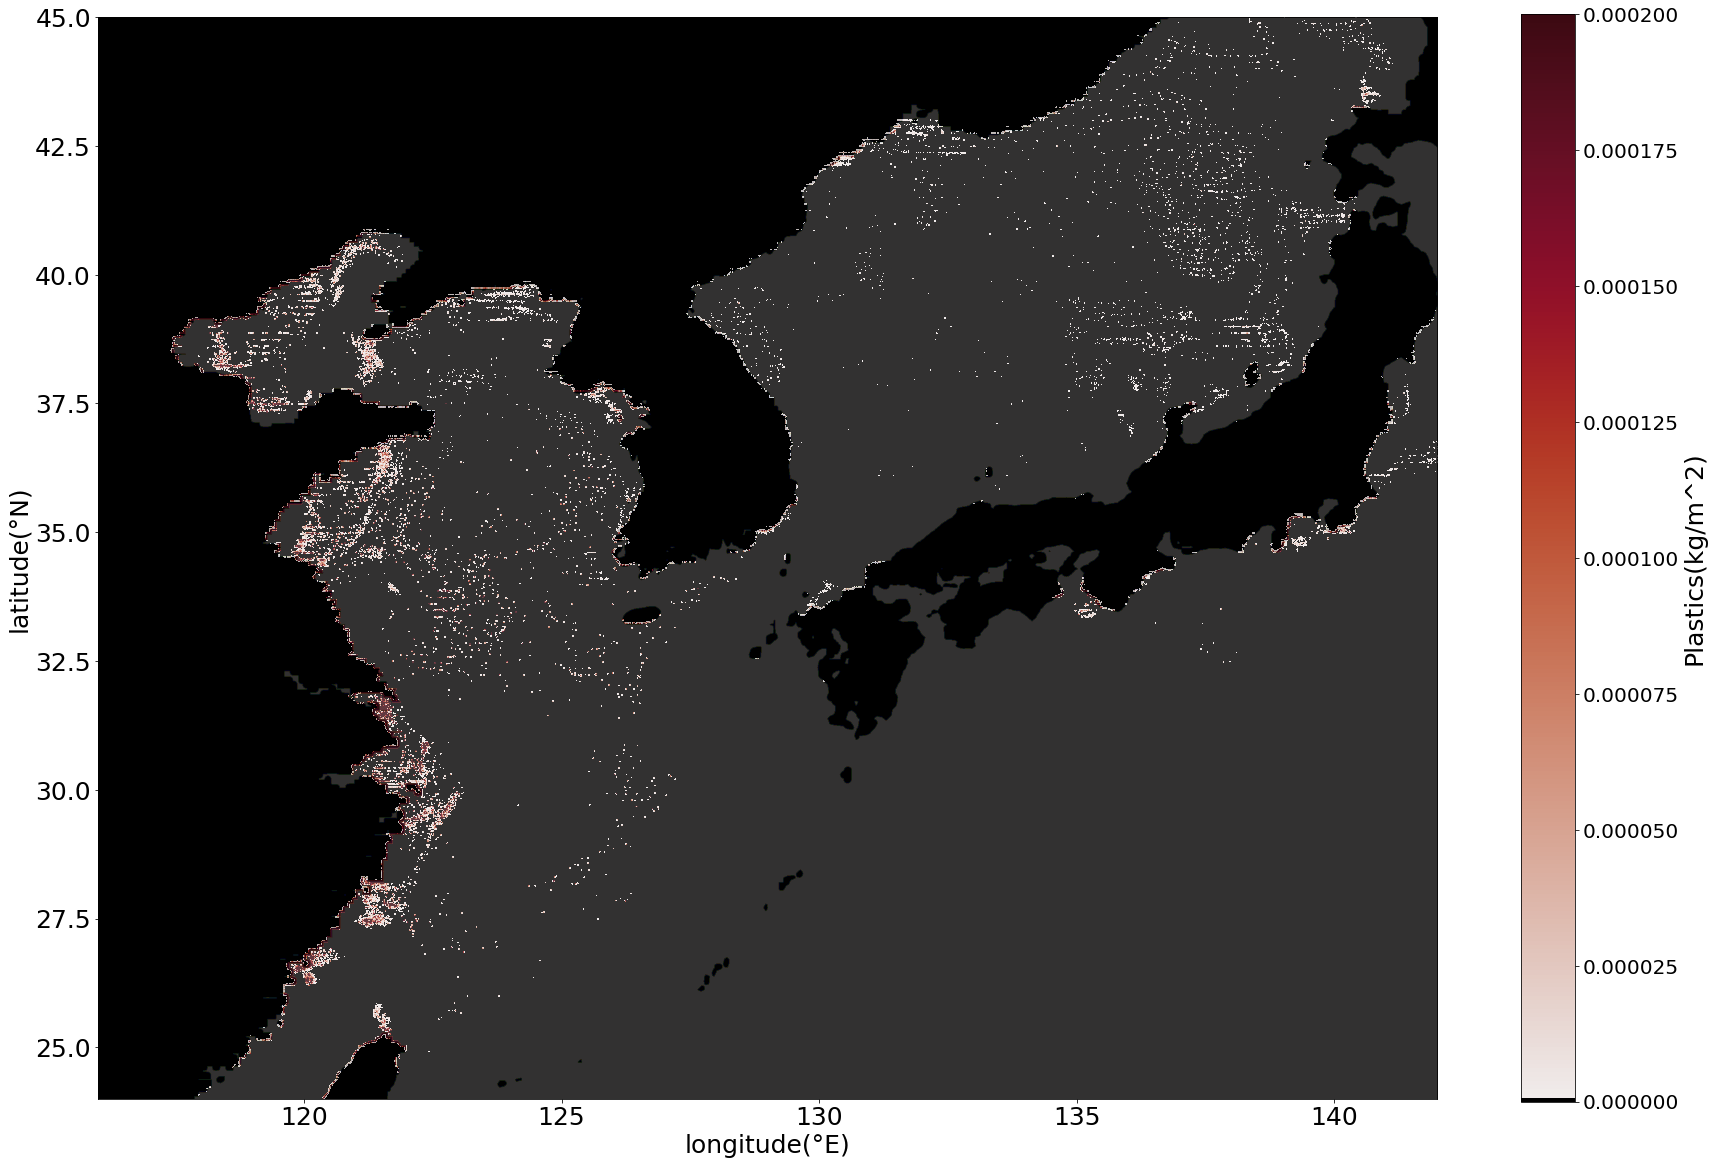

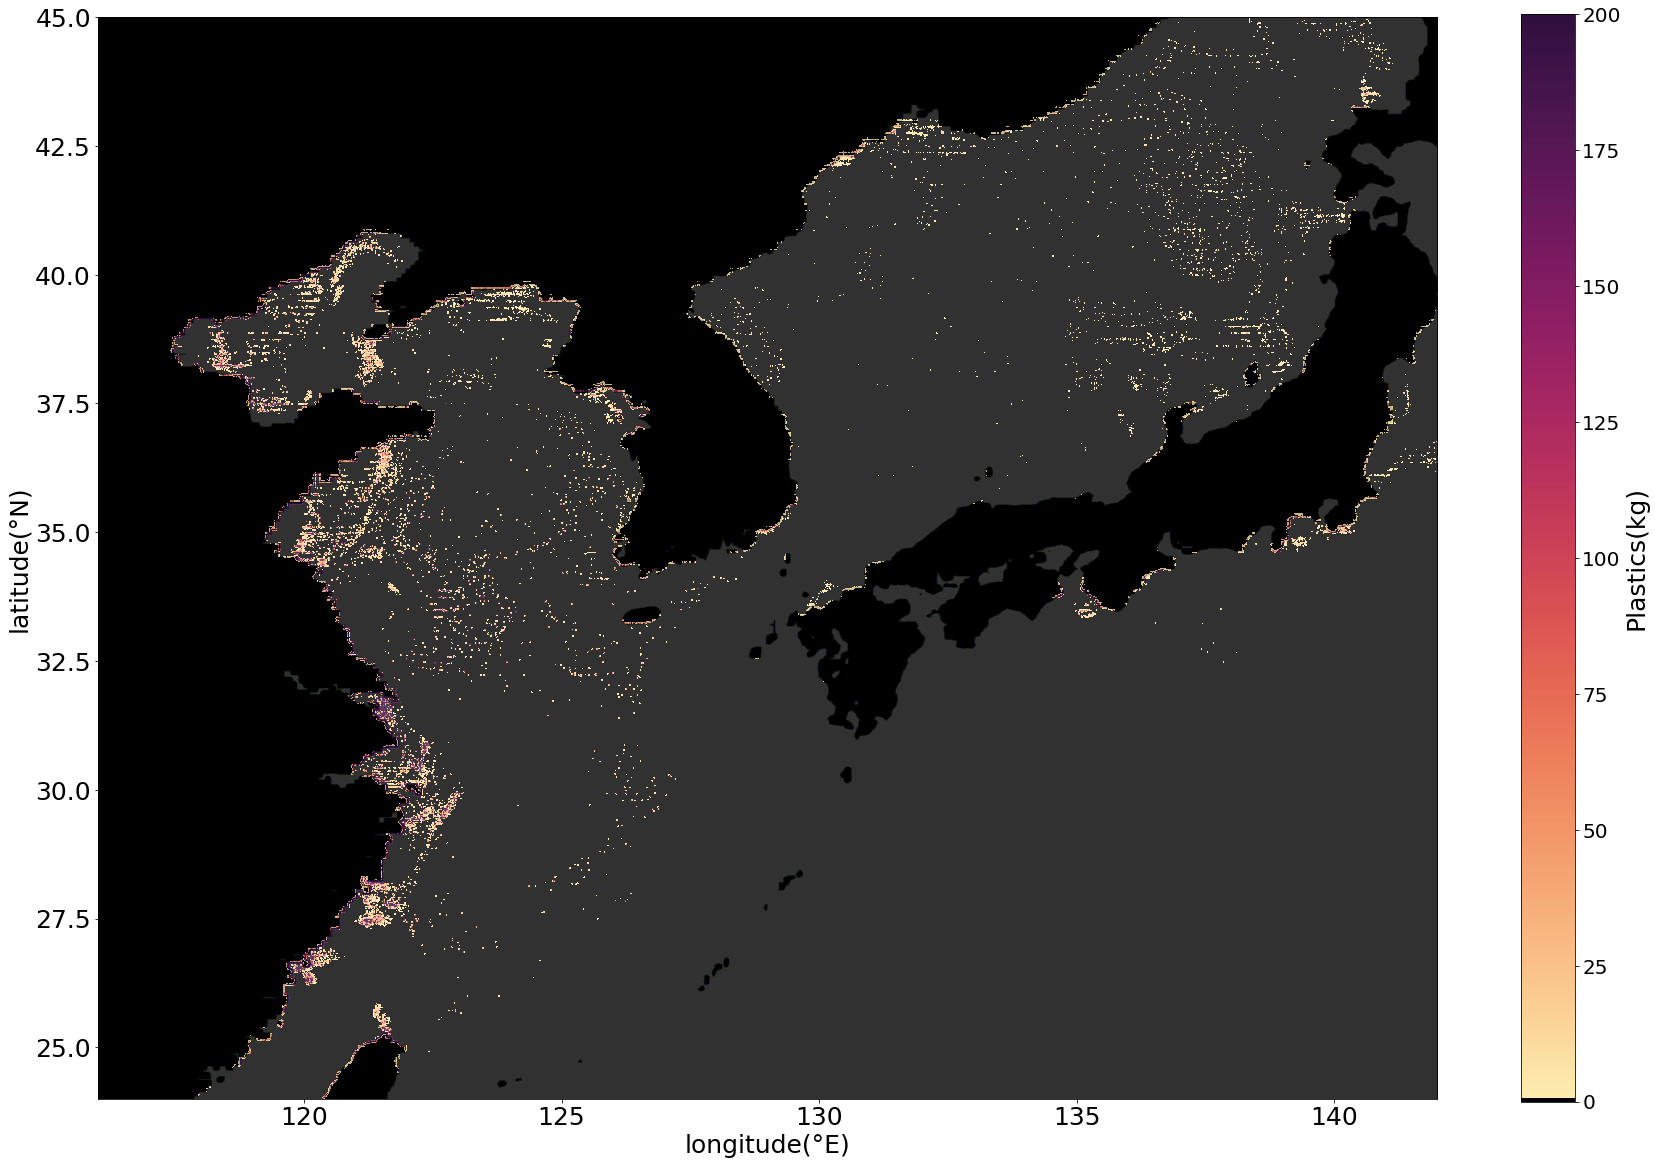

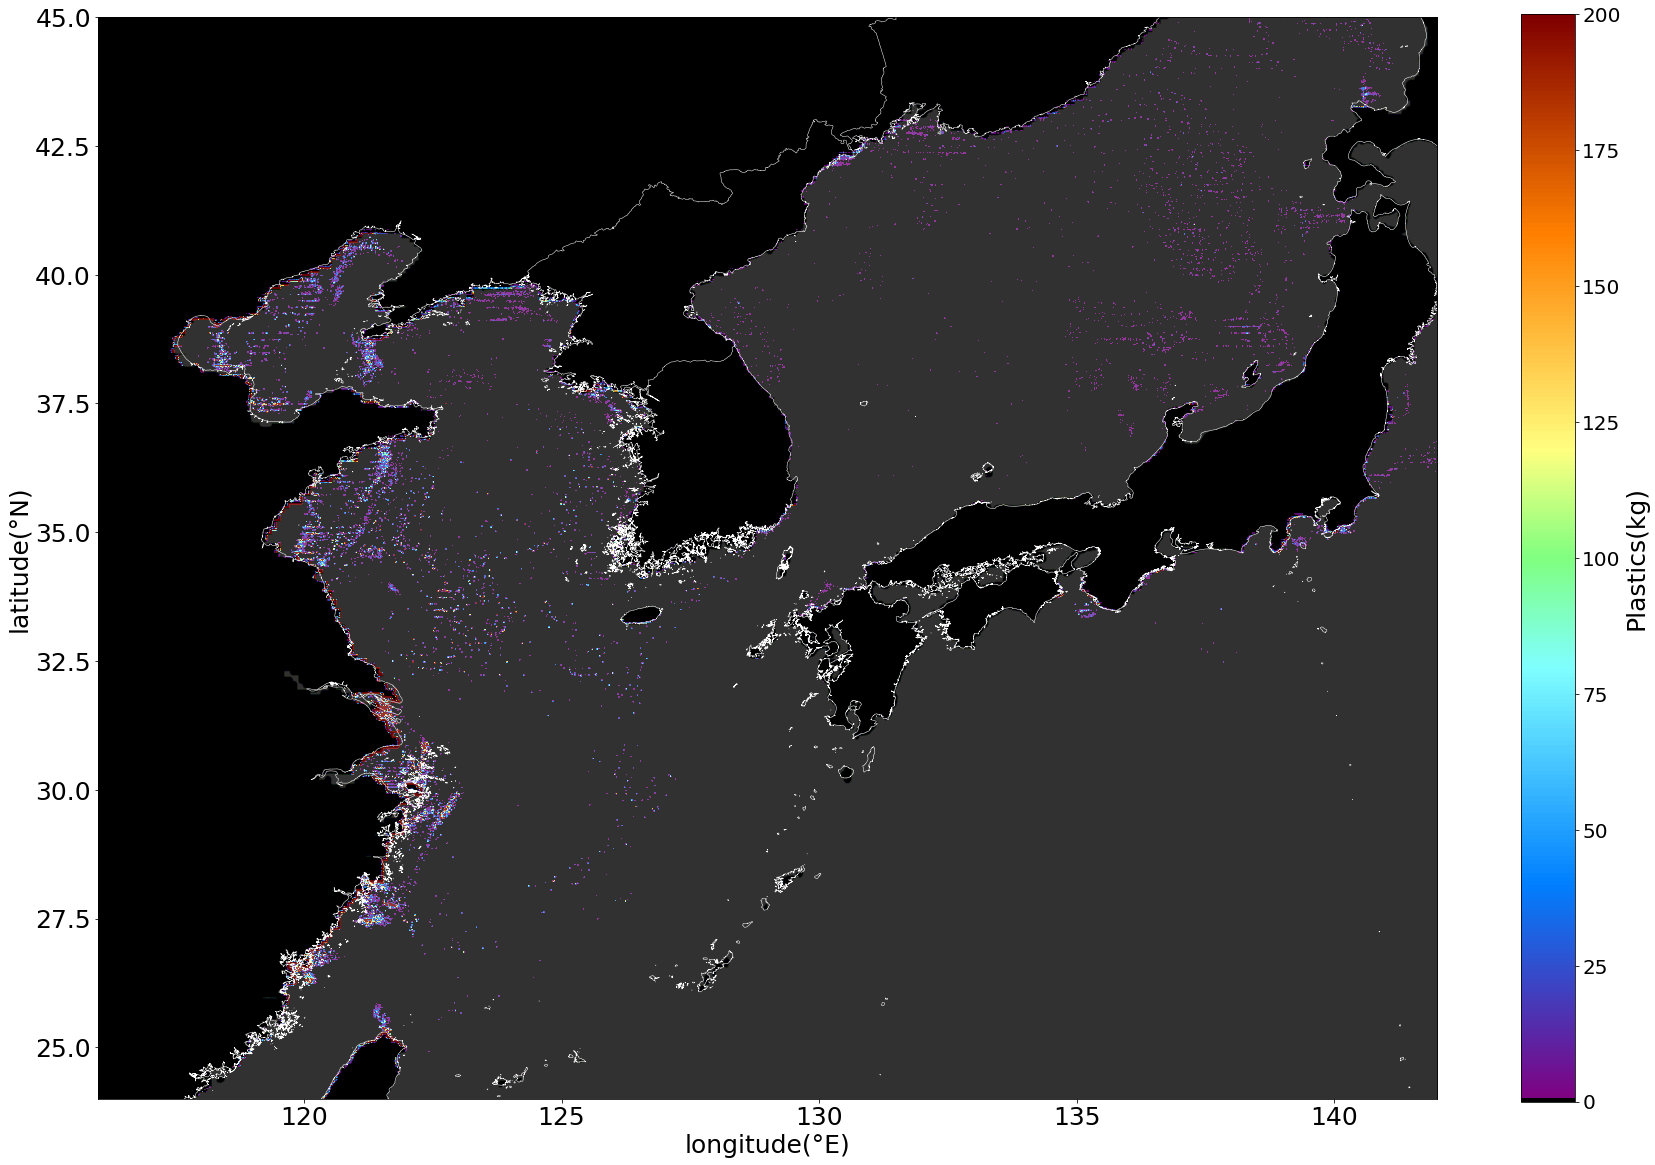

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,20))
file_name = '/content/drive/MyDrive/plastic_transporting/plastic_table_wo_beaching/all' + unique_time[-20] + '.csv'
table = np.array(pd.read_csv(file_name))
date = date_form(unique_time[-19])
plt.imshow(4.372 * 10**(-6) * (table), cmap = amp, extent = plot_extent, alpha = 1 )
plt.clim(0,0.0002)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
cbar.set_label(r'Plastics(kg/m^2)',  fontsize = 25)
plt.imshow(table_land , 'gist_earth_r', extent = plot_extent, alpha = 0.2)
plt.clim(0, 1)
plt.ylim(min_lat, max_lat)
plt.xlim(min_lon, max_lon)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('longitude(\N{DEGREE SIGN}E)', fontsize = 25)
plt.ylabel('latitude(\N{DEGREE SIGN}N)', fontsize = 25)
plt.text(117, 44, str(date)[:-8], fontsize= 35, weight = 'bold')
plt.show()

fig = plt.figure(figsize=(30,20))
file_name = '/content/drive/MyDrive/plastic_transporting/plastic_table_wo_beaching/all' + unique_time[-20] + '.csv'
table = np.array(pd.read_csv(file_name))
date = date_form(unique_time[-19])
#plt.plot(lonc, latc, color = 'w', linewidth = 0.5)
#plt.imshow(table_land , 'gist_earth_r', extent = plot_extent, alpha = 1)
plt.imshow(3.425 * (table), cmap = matter, extent = plot_extent, alpha = 1 )
plt.clim(0,200)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Plastics(kg)',  fontsize = 25)
plt.imshow(table_land , 'gist_earth_r', extent = plot_extent, alpha = 0.2)
plt.clim(0, 1)
plt.ylim(min_lat, max_lat)
plt.xlim(min_lon, max_lon)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)


plt.xlabel('longitude(\N{DEGREE SIGN}E)', fontsize = 25)
plt.ylabel('latitude(\N{DEGREE SIGN}N)', fontsize = 25)
plt.text(117, 44, str(date)[:-8], fontsize= 35, weight = 'bold')
plt.show()

fig = plt.figure(figsize=(30,20))

file_name = '/content/drive/MyDrive/plastic_transporting/plastic_table_wo_beaching/all' + unique_time[-20] + '.csv'
table = np.array(pd.read_csv(file_name))
date = date_form(unique_time[-19])
plt.plot(lonc, latc, color = 'w', linewidth = 0.5)
#plt.imshow(table_land , 'gist_earth_r', extent = plot_extent, alpha = 1)

plt.imshow(3.425 * (table), cmap = hsl256_colorbar2, extent = plot_extent, alpha = 1 )
plt.clim(0,200)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Plastics(kg)',  fontsize = 25)
plt.imshow(table_land , 'gist_earth_r', extent = plot_extent, alpha = 0.2)
plt.clim(0, 1)
plt.ylim(min_lat, max_lat)
plt.xlim(min_lon, max_lon)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('longitude(\N{DEGREE SIGN}E)', fontsize = 25)
plt.ylabel('latitude(\N{DEGREE SIGN}N)', fontsize = 25)
plt.text(117, 44, str(date)[:-8], fontsize= 35, weight = 'bold')
plt.show()

In [ ]:
for m in range(len(unique_time)):
  fig = plt.figure(figsize=(30,20))
  date_data = unique_time[m]

  if date_data == unique_time[-1]:
    date_title = date_form(unique_time[-1]) + timedelta(days=5)
  else:
    date_title = date_form(unique_time[m+1])
  
  file_name = '/content/drive/MyDrive/plastic_transporting/plastic_table_wo_beaching/all' + date_data + '.csv'
  table = np.array(pd.read_csv(file_name))

  plt.imshow(3.425* (table), cmap = amp, extent = plot_extent, alpha = 1 )
  plt.clim(0,200)
  cbar = plt.colorbar()
  cbar.ax.tick_params(labelsize=25)
  cbar.set_label('Plastics(kg)',  fontsize = 25)
  plt.imshow(table_land , 'gist_earth_r', extent = plot_extent, alpha = 0.2)
  plt.clim(0, 1)
  plt.ylim(min_lat, max_lat)
  plt.xlim(min_lon, max_lon)
  plt.xticks(fontsize = 25)
  plt.yticks(fontsize = 25)

  plt.xlabel('longitude(\N{DEGREE SIGN}E)', fontsize = 25)
  plt.ylabel('latitude(\N{DEGREE SIGN}N)', fontsize = 25)
  plt.text(117, 44, str(date_title)[:-8], fontsize= 35, weight = 'bold', color = 'w')
  plt.savefig('/content/drive/MyDrive/plastic_transporting/plot/' +  str(date_title) + '.png')
  plt.clf()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

Text(0, 0.5, 'latitude(°N)')

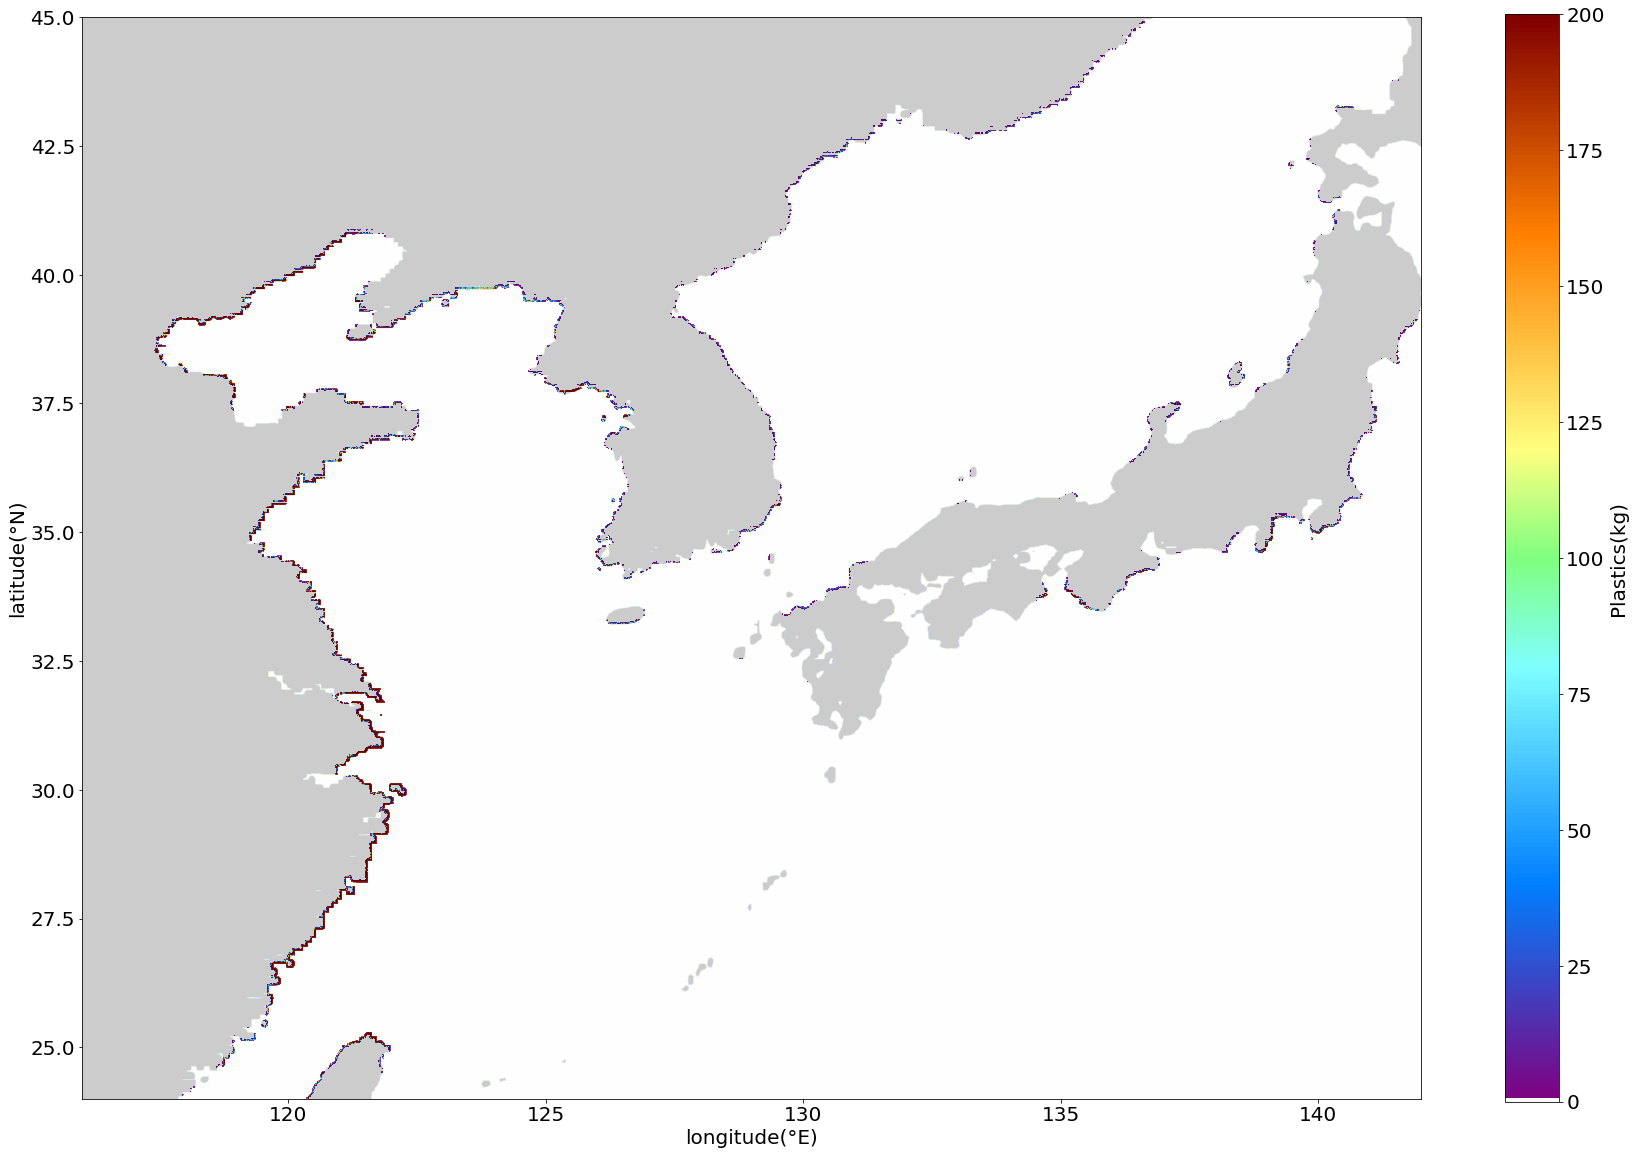

In [ ]:
file_name = '/content/drive/MyDrive/plastic_transporting/plastic_table_wo_beaching/all' + unique_time[-1] + '.csv'
table = np.array(pd.read_csv(file_name))

for i in range(len(table_land)):
  for j in range(len(table_land[0])):
    if table_land[i][j] == 0:
      table[i][j] = 0

fig = plt.figure(figsize=(30,20)) 
plt.imshow(3.425 * (table), cmap = hsl256_colorbar, extent = plot_extent, alpha = 1 )
plt.clim(0,200)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Plastics(kg)',  fontsize = 20)
plt.imshow(table_land , 'gist_earth_r', extent = plot_extent, alpha = 0.2)
plt.clim(0, 1)
plt.ylim(min_lat, max_lat)
plt.xlim(min_lon, max_lon)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


plt.xlabel('longitude(\N{DEGREE SIGN}E)', fontsize = 20)
plt.ylabel('latitude(\N{DEGREE SIGN}N)', fontsize = 20)

In [ ]:
######### Data Analysis


# 해안선에서의 데이터를 추출해보자.

file_region_name = 'all', 's_korea', 'n_korea', 'japan', 'hubei', 'jiangsu', 'liaoning', 'shandong', 'zhejiang', 'taiwan', 'russia'

coastline_tables = []
for name in range(len(file_region_name)):
  region_name = file_region_name[name]
  file_name = '/content/drive/MyDrive/plastic_transporting/plastic_table_wo_beaching/' + region_name + unique_time[-1] + '.csv'
  table = np.array(pd.read_csv(file_name))
  for i in range(len(table_land)):
    for j in range(len(table_land[0])):
      if table_land[i][j] == 0:
        table[i][j] = 0
  coastline_tables.append(table)

In [ ]:
#--------------------------------------------------------------------------------------
### 위도, 경도 -> Index
#--------------------------------------------------------------------------------------
### 주어진 경도 데이터가 왼쪽에서부터 몇번째 항에 있는지 알려주는 함수
def find_number_lon_dir(lon):
  number = int((lon - min_lon) / d_lon_lat)
  return number

## 주어진 위도 데이터가 위에서부터 몇번째 항에 있는지 알려주는 함수
def find_number_lat_dir(lat):
  number = int((max_lat - lat) / d_lon_lat)
  return number

### 주어진 경도 데이터가 왼쪽에서부터 몇번째 항에 있는지 알려주는 함수 (내삽 전)
def find_number_lon_dir_before_interpolation(lon):
  number = int((lon - min_lon) / d_lon_lat_before_interpolation)
  return number

## 주어진 위도 데이터가 위에서부터 몇번째 항에 있는지 알려주는 함수 (내삽 전)
def find_number_lat_dir_before_interpolation(lat):
  number = int((max_lat - lat) / d_lon_lat_before_interpolation)
  return number


#--------------------------------------------------------------------------------------
### 위도, 경도 <- Index
#--------------------------------------------------------------------------------------
## 위와 반대로 n번째 n항 데이터의 위도, 경도가 어디인지 알려주는 함수
def find_lat_from_number(number):
  lat_grid_after_interpolation_reverse = lat_grid_after_interpolation[::-1]
  lat = lat_grid_after_interpolation_reverse[number]
  return lat

def find_lon_from_number(number):
  lon = lon_grid_after_interpolation[number]
  return lon